In [1]:
import time
import urllib

import bs4
import requests

In [2]:
start_url = "http://www.imdb.com/search/title?year=2017&page=1&ref_=adv_nxt"
target_url="http://www.imdb.com/search/title?year=2017&page=6&ref_=adv_nxt"

title_list = []
watchable_list = []
genre_list = []
rating_list = []

In [3]:
def find_first_link(url):
    response = requests.get(url)
    html = response.text
    soup = bs4.BeautifulSoup(html, "html.parser")
    content_div = soup.find(class_="desc").find(class_="lister-page-next next-page")

    #Section to do work
    content_div2 = soup.find_all(class_="lister-item-content")
    
    for content in content_div2:
        score = 0.0
        count = 0
        genre = content.find(class_="genre").get_text()
        rating = content.find(class_="ratings-bar").find(class_="inline-block ratings-imdb-rating").get("data-value")
        
        name = content.find(class_="lister-item-header").a.get_text()
        title_list.append(name)
        if "Action" in genre:
            score+=6
            count+=10
        if "Adventure" in genre:
            score+=6
            count+=10
        if "Comedy" in genre:
            score+=7
            count+=10
        if "Crime" in genre:
            score+=6
            count+=10
        if "Drama" in genre:
            score+=9
            count+=10
        if "Fantasy" in genre:
            score+=6
            count+=10
        if "Historical" in genre:
            score+=5
            count+=10
        if "Biography" in genre:
            score+=6
            count+=10
        if "Horror" in genre:
            score+=4
            count+=10
        if "Mystery" in genre:
            score+=6
            count+=10
        if "Musical" in genre:
            score+=8
            count+=10
        if "Sci-Fi" in genre:
            score+=8
            count+=10
        if "Romance" in genre:
            score+=8
            count+=10
        if "Thriller" in genre:
            score+=7
            count+=10


        if count==0:
            genre_score = 6/10;    
        else:    
            genre_score = score/count
        genre_list.append(genre_score)

        rating_score = float(rating)/10.0
        rating_list.append(rating_score)

        total_score = genre_score + rating_score

        if total_score>=1.33:
            watchable_list.append(1.0)
        else:
            watchable_list.append(0.0)
            
        
    article_link = None
    article_link = content_div.get('href')

    if not article_link:
        return
    first_link = urllib.parse.urljoin('http://www.imdb.com/search/title', article_link)

    return first_link

In [4]:

def continue_crawl(search_history, target_url, max_steps=51):
    if search_history[-1] == target_url:
        print("We've found the target article!")
        return False
    elif len(search_history) > max_steps:
        print("The search has gone on suspiciously long, aborting search!")
        return False
    elif search_history[-1] in search_history[:-1]:
        print("We've arrived at an article we've already seen, aborting search!")
        return False
    else:
        return True

In [5]:
article_chain = [start_url]

while continue_crawl(article_chain, target_url):
    print(article_chain[-1])

    first_link = find_first_link(article_chain[-1])
    if not first_link:
        print("We've arrived at an article with no links, aborting search!")
        break
    article_chain.append(first_link)
    time.sleep(4)


X = [[g, r] for g, r in zip(genre_list, rating_list)]
split = int(0.75*len(watchable_list))
X_train = X[0:split]
X_test  = X[split:]
y_train = watchable_list[0:split]
y_test  = watchable_list[split:] 


http://www.imdb.com/search/title?year=2017&page=1&ref_=adv_nxt
http://www.imdb.com/search/title?year=2017&page=2&ref_=adv_nxt
http://www.imdb.com/search/title?year=2017&page=3&ref_=adv_nxt
http://www.imdb.com/search/title?year=2017&page=4&ref_=adv_nxt
http://www.imdb.com/search/title?year=2017&page=5&ref_=adv_nxt
We've found the target article!


In [6]:
import matplotlib.pyplot as plt
plt.scatter(genre_list,rating_list)
plt.show()



In [7]:
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=2)
cls_fit = cls.fit(X_train)
pred = cls_fit.predict(X_train)

In [8]:
print (pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0
 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0
 1 0]


In [9]:
print(cls_fit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [10]:
print (cls_fit.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0
 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0
 1 0]


In [11]:
print (cls_fit.predict([[1, 1], [0.5, 0.5]]))

[0 1]


In [12]:
print (cls_fit.cluster_centers_)

[[0.76127946 0.77373737]
 [0.64905303 0.63238636]]


In [13]:
 
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()


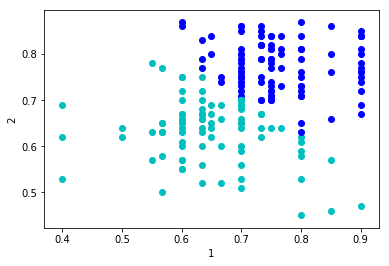

In [14]:

try:
    Draw(pred, X_train, y_train, mark_poi=False, name="clusters3.pdf", f1_name="1", f2_name="2")
except NameError:
    print ("no predictions object named pred found, no clusters to plot")
               